In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel(r"C:\Users\91828\Downloads\iris.xls")     #read the data set in python environment

In [22]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#preprocessing

In [23]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [32]:
#fill the missing values in the column SL,SW,PL
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [33]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2e45b63d820>,
 'caps': [<matplotlib.lines.Line2D at 0x2e45b63dd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e45b63d520>],
 'medians': [<matplotlib.lines.Line2D at 0x2e45b64b490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e45b64b7f0>],
 'means': []}

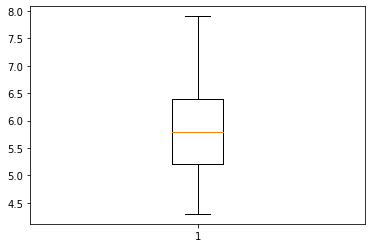

In [34]:
#checking outliers
plt.boxplot(data['SL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23a9f6010d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23a9f601790>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a9f5f3d30>],
 'medians': [<matplotlib.lines.Line2D at 0x23a9f601e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a9f60c1f0>],
 'means': []}

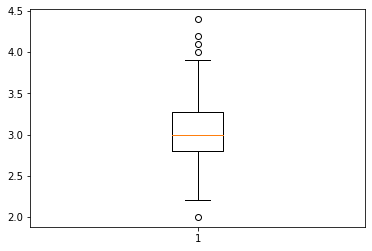

In [30]:
plt.boxplot(data['SW'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e45b6a0700>,
 'caps': [<matplotlib.lines.Line2D at 0x2e45b6a0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e45b6a03a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e45b6ad4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e45b6ad820>],
 'means': []}

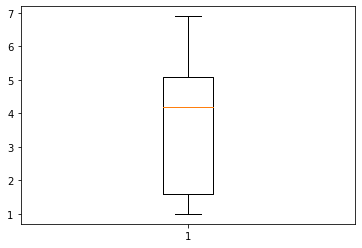

In [35]:
plt.boxplot(data['PL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e45b468a30>,
 'caps': [<matplotlib.lines.Line2D at 0x2e45b476130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e45b4686d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2e45b4767f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e45b476b50>],
 'means': []}

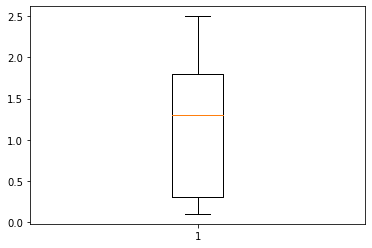

In [24]:
plt.boxplot(data['PW'])                                                            

In [33]:
#Removing outliers in 'SW'column

In [36]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')   
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [37]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

2.1249999999999996
3.9250000000000003


In [38]:
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [39]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [41]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [42]:
data=data.drop(data.loc[ind1].index)

In [46]:
ind2=data['SW']<low_lim
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [48]:
data=data.drop(data.loc[ind2].index)

Text(0.5, 1.0, 'Box Plot of SW')

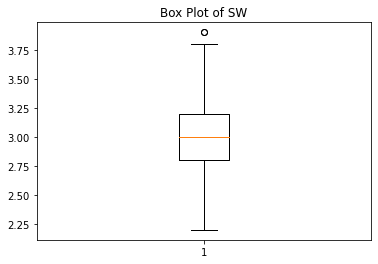

In [49]:
plt.boxplot(data["SW"])
plt.title("Box Plot of SW")

In [44]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')   
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.2


In [50]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

2.1999999999999993
3.8000000000000007


In [52]:
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [53]:
outlier


[3.9, 3.9]

In [55]:
ind3=data['SW']>up_lim
data.loc[ind3].index

Int64Index([5, 16], dtype='int64')

Text(0.5, 1.0, 'Box Plot of SW')

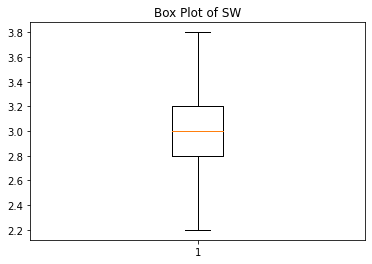

In [57]:
data=data.drop(data.loc[ind3].index)
plt.boxplot(data["SW"])
plt.title("Box Plot of SW")

In [58]:
#Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [60]:
y=pd.DataFrame(data['Classification'])    #split into x and y
X=data.drop(['Classification'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

<ipython-input-62-dbe7daaf9fd6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [63]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,accuracy_score
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 13,  1],
       [ 0,  3, 10]], dtype=int64)

In [64]:
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,pos_label='positive',average='micro'))
print('accuracy:',accuracy_score(y_test,y_pred))

Precision Score :  0.9069767441860465
Recall Score :  0.9069767441860465
accuracy: 0.9069767441860465


C:\Users\91828\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\91828\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [65]:
#linear SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel="linear")
svm_linear.fit(X_train,y_train)

C:\Users\91828\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [66]:
y_pred3=svm_linear.predict(X_test)
print("Accuracy using linear svm is", accuracy_score(y_test,y_pred3))

Accuracy using linear svm is 0.8837209302325582
